In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import os
for dirname, _, filenames in os.walk('Source'):
    for filename in filenames:
        print(dirname + "/" + filename)

Source/data_description.txt
Source/sample_submission.csv
Source/test.csv
Source/train.csv


In [2]:
original_training=pd.read_csv("Source/train.csv")
original_test=pd.read_csv("Source/test.csv")
training=original_training.copy()
test=original_test.copy()
training.head()
print(training.shape)
print(test.head())

(1460, 81)
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0    

In [3]:
#Identify numerical variables
#Features PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage has alot of missing values. 
print(training.info())
training_null_sum=training.isnull().sum()
training_null_sum=training_null_sum[training_null_sum>0]
print(training_null_sum.sort_values(ascending=False))
#training.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"],axis=1,inplace=True)
#print(training.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
training_null_sum_index=training_null_sum.index.tolist()
print(training_null_sum_index)
print(training[training_null_sum_index].dtypes)
training.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"],axis=1,inplace=True)
num_null=["MasVnrArea","GarageYrBlt"]
object_null=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
training[num_null]=training[num_null].fillna(training.median())
training[object_null]=training[object_null].fillna(training.mode().iloc[0])

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [5]:
training_null_sum2=training.isnull().sum()
#training_null_sum2=training_null_sum2[training_null_sum2>0]
print(training_null_sum2.sort_values(ascending=False))
training_gd=pd.get_dummies(training)
#print(training_gd.columns.tolist())
#print(training_gd["SalePrice"].describe())
#figure(figsize=(20,10))
#sns.heatmap(training.corr(),annot=True)
#plt.show()

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64


{0: 271, 1: 167, 2: 124, 3: 82, 4: 66, 5: 50, 6: 44, 7: 32, 8: 27, 9: 23, 10: 16, 11: 10, 12: 7, 13: 3, 14: 3, 15: 2, 16: 1, 17: 1, 18: 1, 19: 1}


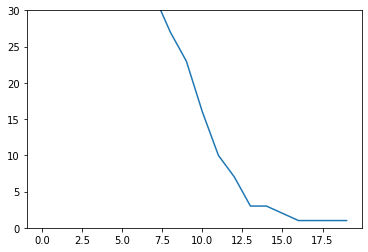

In [6]:
#Correlation of 0.55 gives 10 variables.
corrmat=training_gd.corr()
corr_dict={}
for step in range(0,20,1):
    highest_corr_features_list=corrmat.index[abs(corrmat["SalePrice"])>step/20]
    corr_dict.update({step:len(highest_corr_features_list)})
print(corr_dict)
corr_dict_keys=list(corr_dict.keys())
corr_dict_values=list(corr_dict.values())
ax=sns.lineplot(data=corr_dict,x=corr_dict_keys,y=corr_dict_values)
ax.set(ylim=(0,30))
plt.show()

['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex']


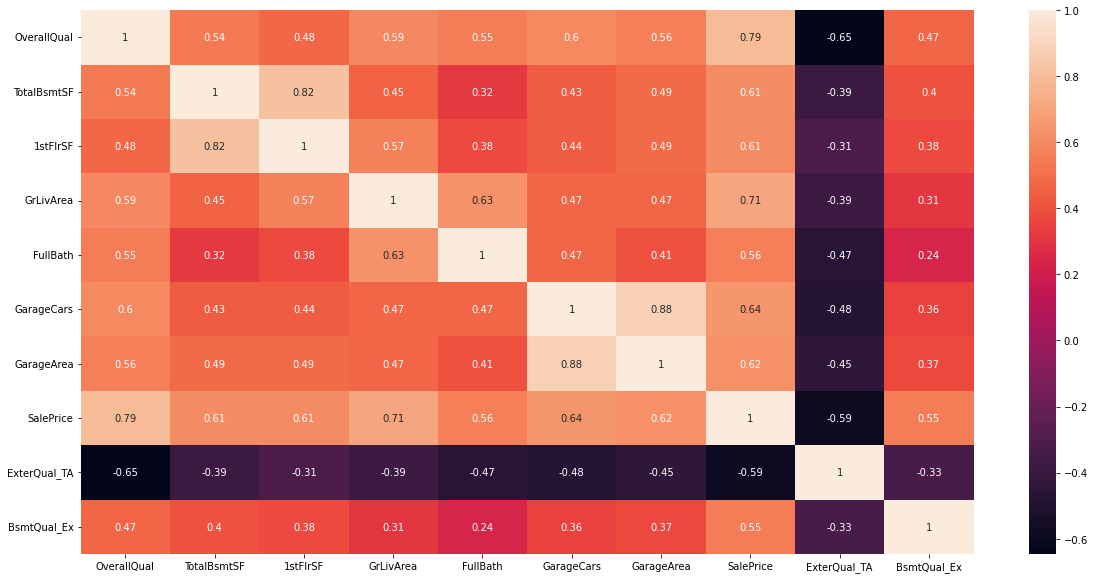

In [7]:
highest_corr_features_list=corrmat.index[abs(corrmat["SalePrice"])>0.55]
highest_corr_features_df=training_gd[highest_corr_features_list]
plt.figure(figsize=(20,10))
g=sns.heatmap(highest_corr_features_df.corr(),annot=True)
highest_corr_features_df_columns_list=highest_corr_features_df.columns.tolist()
print(highest_corr_features_df_columns_list)

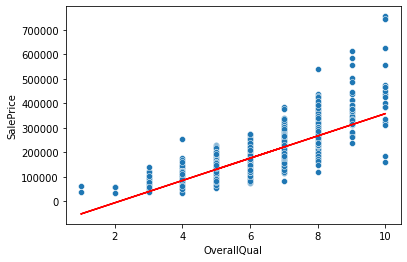

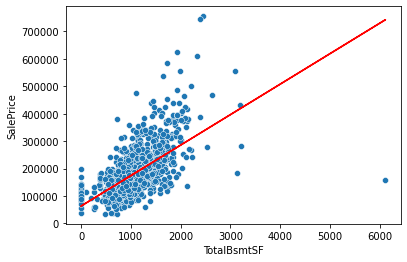

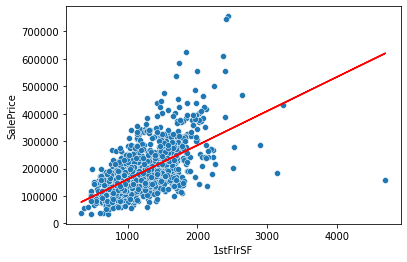

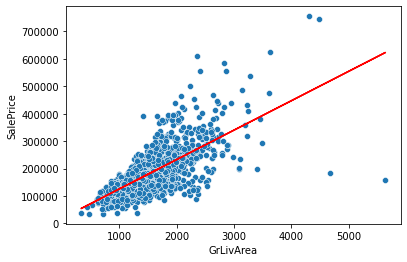

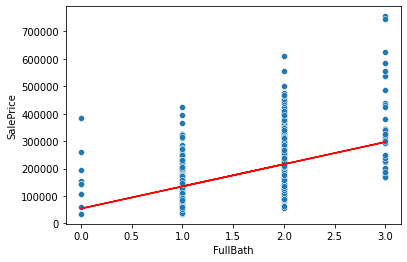

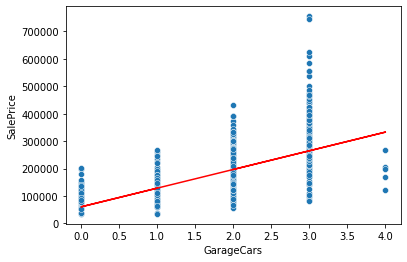

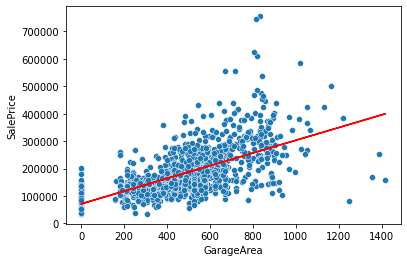

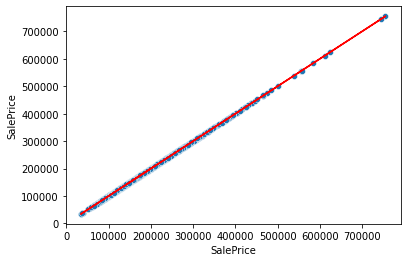

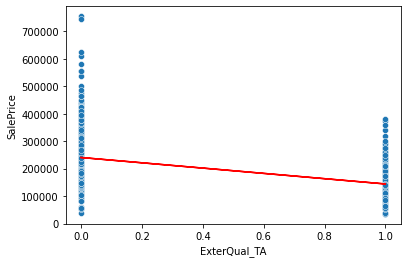

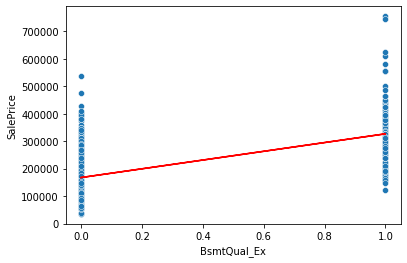

In [8]:
for f in highest_corr_features_list:
    sns.scatterplot(data=highest_corr_features_df,x=f,y="SalePrice")
    x=highest_corr_features_df[f]
    y=highest_corr_features_df["SalePrice"]
    m,b=np.polyfit(x,y,1)
    plt.plot(x,m*x+b,linestyle="-",color="red")
    plt.show()

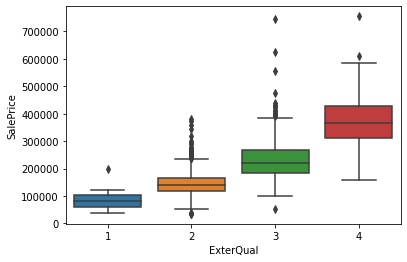

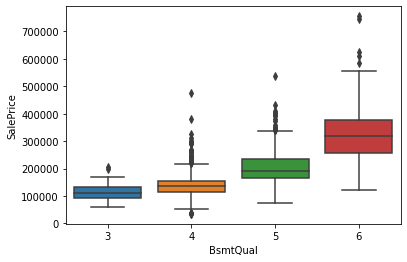

In [9]:
#Is this Feature Engineering???
#Inspect ExterQual Vs SalePrice
#ExterQual.TA is inversely proportional with SalePrice because TA is lower than Gd and Ex
#BsmtQual.Ex is proportional with SalePrice because Ex is the highest level of BsmtQual
training["ExterQual"]=training["ExterQual"].replace(["Fa","TA","Gd","Ex"],["1","2","3","4"]).astype(int)
training["BsmtQual"]=training["BsmtQual"].replace(["Na","Po","Fa","TA","Gd","Ex"],["1","2","3","4","5","6"]).astype(int)
sns.boxplot(data=training,x="ExterQual",y="SalePrice")
plt.show()
sns.boxplot(data=training,x="BsmtQual",y="SalePrice")
plt.show()

In [10]:
#Filter training columns
#Replace get_dummies columns with original column.
highest_corr_features_df_columns_list[-1]="BsmtQual"
highest_corr_features_df_columns_list[-2]="ExterQual"
training_modelling=training[highest_corr_features_df_columns_list]
training_modelling_variable=training_modelling.drop("SalePrice",axis=1)
training_modelling_target=training_modelling["SalePrice"]

In [11]:
#Add SalesPrice column to test
test["SalePrice"]=int(0)
#Modify Test columns to equal Train columns
test_modelling=test[highest_corr_features_df_columns_list]
#Replace Test.BsmtQual with training.mode()
test_modelling[["TotalBsmtSF","GarageCars","GarageArea","BsmtQual"]]=test_modelling[["TotalBsmtSF","GarageCars","GarageArea","BsmtQual"]].fillna(training[["TotalBsmtSF","GarageCars","GarageArea","BsmtQual"]].mode().iloc[0])
#Modelling_columns_list=highest_corr_features_df_columns_list.replace(['ExterQual_TA', 'BsmtQual_Ex'],["ExterQual","BsmtQual"])
test_modelling["ExterQual"]=test_modelling["ExterQual"].replace(["Fa","TA","Gd","Ex"],["1","2","3","4"]).astype(int)
test_modelling["BsmtQual"]=test_modelling["BsmtQual"].replace(["Na","Po","Fa","TA","Gd","Ex"],["1","2","3","4","5","6"]).astype(int)
print(training_modelling.head())
print(test_modelling.head())
print(test_modelling.shape)

   OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  GarageCars  \
0            7          856       856       1710         2           2   
1            6         1262      1262       1262         2           2   
2            7          920       920       1786         2           2   
3            7          756       961       1717         1           3   
4            8         1145      1145       2198         2           3   

   GarageArea  SalePrice  ExterQual  BsmtQual  
0         548     208500          3         5  
1         460     181500          2         5  
2         608     223500          3         5  
3         642     140000          2         4  
4         836     250000          3         5  
   OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  GarageCars  \
0            5        882.0       896        896         1         1.0   
1            6       1329.0      1329       1329         1         1.0   
2            5        928.0       928       1

In [12]:
#Create Test model variable and target df
test_modelling_variable=test_modelling.drop("SalePrice",axis=1)
test_modelling_target=pd.DataFrame(test_modelling["SalePrice"])
print(test_modelling_variable.shape)
print(test_modelling_target.shape)

(1459, 9)
(1459, 1)


In [13]:
#Modelling
#Train test split
X_train,X_test,y_train,y_test=train_test_split(training_modelling_variable,training_modelling_target,test_size=0.2,\
                                               random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1168, 9) (292, 9) (1168,) (292,)


In [14]:
#Linear Regression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print(mean_squared_error(y_test,y_predict))

1456310972.2680426


In [15]:
#Cross Validation Score
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr, training_modelling_variable,training_modelling_target, scoring='r2', cv=folds)
print(scores)

[0.82539631 0.79201202 0.66100041 0.77926114 0.79587115]


In [16]:
#Cross Validation Prediction
cv=GridSearchCV(lr,cv=5,param_grid={})
model_cv=cv.fit(training_modelling_variable,training_modelling_target)
test_predict=model_cv.predict(test_modelling_variable)
test_modelling_target["SalePrice"]=pd.DataFrame(test_predict)
print(test_modelling_target)

          SalePrice
0     111039.526308
1     153002.107553
2     164155.550183
3     160042.146282
4     222910.018397
...             ...
1454   71729.921101
1455   86456.434741
1456  143744.639191
1457  111403.622720
1458  227240.335393

[1459 rows x 1 columns]


In [17]:
#Test Modelling
test_modelling_combined=pd.concat([test_modelling_variable,test_modelling_target],axis=1)


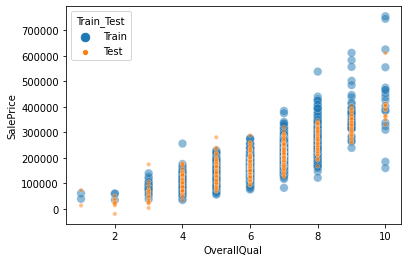

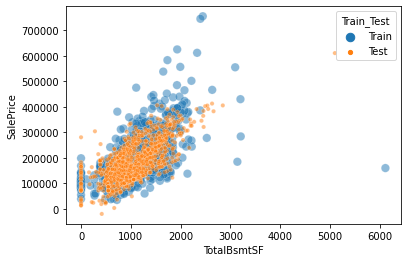

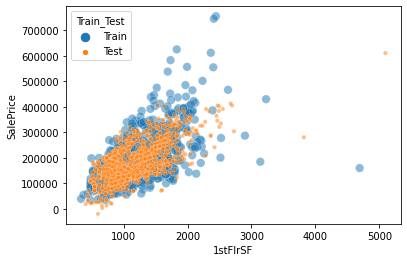

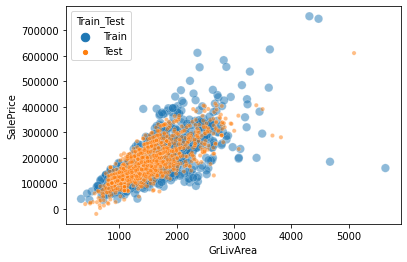

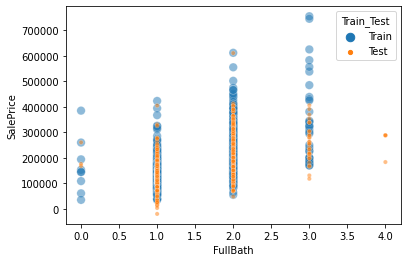

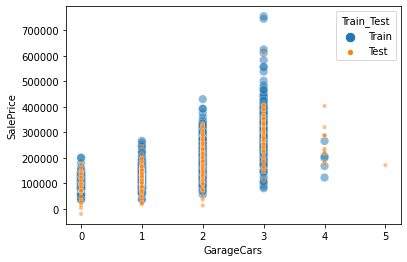

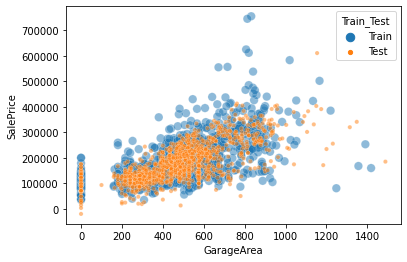

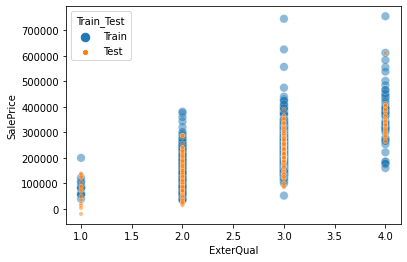

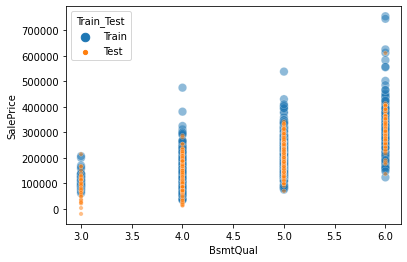

In [18]:
#Comparing between Train and Test Targets
training_modelling["Train_Test"]="Train"
test_modelling_combined["Train_Test"]="Test"
All_data=pd.concat([training_modelling,test_modelling_combined])
All_data_column_list=All_data.columns.tolist()

for column in All_data_column_list:
    if column in ["Train_Test","SalePrice"]:
        continue
    sns.scatterplot(data=All_data,x=column,y="SalePrice",hue="Train_Test",size="Train_Test",alpha=0.5)
    plt.show()

In [19]:
#Create submission file
submission_file=test_modelling_target
submission_file["Id"]=test["Id"]
submission_file.set_index("Id",inplace=True)
print(submission_file)
submission_file.to_csv("submission_v1.0.csv",index=True)

          SalePrice
Id                 
1461  111039.526308
1462  153002.107553
1463  164155.550183
1464  160042.146282
1465  222910.018397
...             ...
2915   71729.921101
2916   86456.434741
2917  143744.639191
2918  111403.622720
2919  227240.335393

[1459 rows x 1 columns]
